In [3]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery (images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8*n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_rown_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [4]:
import os

# Specify the directory path
dir_name = "dataset/faces/"

# Create the directory if it doesn't exist
os.makedirs(dir_name, exist_ok=True)

# Verify the directory exists
if os.path.exists(dir_name):
    print(f"Directory '{dir_name}' created successfully or already exists.")
else:
    print(f"Failed to create directory '{dir_name}'.")

Directory 'dataset/faces/' created successfully or already exists.


In [5]:
dir_name="dataset/faces/"
y=[];X=[];target_names=[];person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    #print(person_name)
    dir_path = dir_name+person_name+"/" 
    class_names.append(person_name)
    for image_name in os.listdir(dir_path): #formulate the image path
        image_path = dir_path+image_name
        #Read the input image img = cv2.imread(image_path)
        #Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #jesize image to 300*300 dimension
        resized_image= cv2.resize(gray, (h,w))
        #convert matrix to vector
        v = resized_image.flatten()
        X.append(v)
        #increase the number of samples
        n_samples =n_samples+1
        #Addinng th categorical Label
        y.append(person_id)
        #adding the person name 
        target_names.append(person_name)
    #Increase the person id by 1 
    person_id=person_id+1
#transform List to numpy array
y=np.array(y) 
X=np.array(X)
target_names =np.array(target_names) 
n_features= X.shape[0]
print(y. shape, X. shape, target_names.shape)
print("Number of sampels:",n_samples)
#DownLoad the data, if not already on disk and Load it as numpy arrays

#If people fetch_Lfw_people(min_faces_per_person-70, resize-0.4)

# # introspect the images arrays to find the shapes (for plotting)
#n samples, h, wLfw people. images.shape
#for machine Learning we use the 2 data directly (os relative pixel)
#print(n_samples, h, w)
#positions info is ignored by this model)
#x1fw people.dato
#n_features= X.shape[1]

#print(X. shape)
#the Label to predict is the id of the person
#yLfw people, target
#print(y) #if e in y:
# print("yes")
#torget names fe people, turget_names
#print(target names)
n_classes= target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

(0,) (0,) (0,)
Number of sampels: 0
Total dataset size:
n_samples: 0
n_features: 0
n_classes: 0


Total samples: 450
Class names: ['Aamir', 'Ajay', 'Akshay', 'Alia', 'Amitabh', 'Deepika', 'Disha', 'Farhan', 'Ileana']
Training samples: 337, Testing samples: 113
Extracting the top 150 eigenfaces from 337 faces


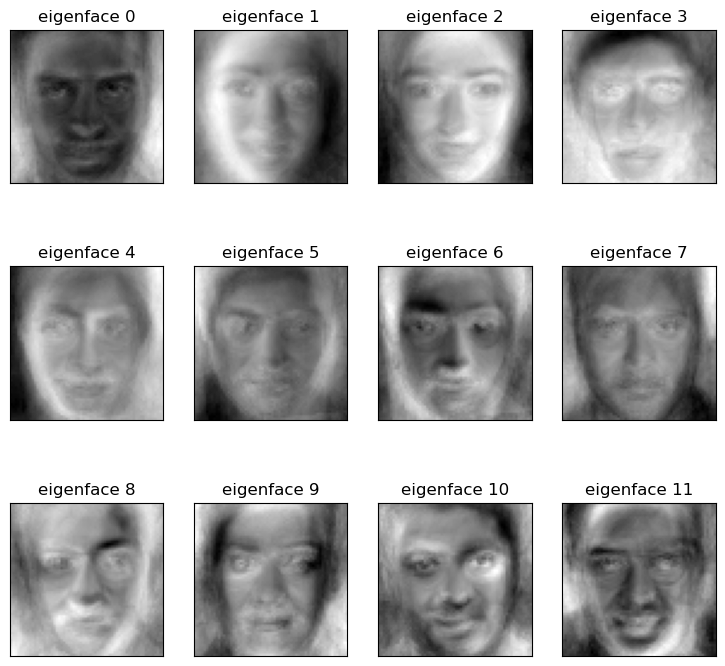

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Projection done...


In [6]:
import os
import zipfile
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Extract the zip file
zip_path = r"C:\Users\oorja\Downloads\dataset.zip"
extract_dir = r"C:\Users\oorja\Downloads\dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Path to the extracted faces directory
dir_name = os.path.join(extract_dir, "dataset", "faces")

# Initialize lists to hold the data and labels
X = []
y = []
h, w = 64, 64  # Height and width to resize images

# Check if the directory exists
if not os.path.exists(dir_name):
    print(f"Directory '{dir_name}' does not exist. Please check the path.")
else:
    class_names = []
    label = 0
    for person_name in os.listdir(dir_name):
        dir_path = os.path.join(dir_name, person_name)
        if os.path.isdir(dir_path):
            class_names.append(person_name)
            for file_name in os.listdir(dir_path):
                file_path = os.path.join(dir_path, file_name)
                if os.path.isfile(file_path):
                    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None:
                        image_resized = cv2.resize(image, (w, h))
                        X.append(image_resized.flatten())  # Flatten the image
                        y.append(label)
            label += 1

X = np.array(X)
y = np.array(y)

print(f"Total samples: {len(X)}")
print(f"Class names: {class_names}")

# Check if data is loaded
if len(X) == 0:
    print("No data loaded. Please check the dataset directory and images.")
else:
    # Split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

    print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

    # Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled 
    # dataset); unsupervised feature extraction/dimensionality reduction 
    n_components = 150

    print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

    # Applying PCA 
    pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

    # Generating eigenface
    eigenfaces = pca.components_.reshape((n_components, h, w))

    # Helper function to plot a gallery of portraits
    def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
        plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
        for i in range(n_row * n_col):
            plt.subplot(n_row, n_col, i + 1)
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
            plt.title(titles[i], size=12)
            plt.xticks(())
            plt.yticks(())

    # Plot the gallery of the most significant eigenfaces
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])] 
    plot_gallery(eigenfaces, eigenface_titles, h, w)

    plt.show()

    print("Projecting the input data on the eigenfaces orthonormal basis")
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    print(X_train_pca.shape, X_test_pca.shape)

    # Compute Fisherfaces
    lda = LinearDiscriminantAnalysis()

    # Compute LDA of reduced data
    lda.fit(X_train_pca, y_train)

    X_train_lda = lda.transform(X_train_pca)
    X_test_lda = lda.transform(X_test_pca)
    print("Projection done...")


In [7]:
# Training with Multi Layer Perceptron
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True)
clf.fit(X_train_lda, y_train)

print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 2.46447217
Iteration 2, loss = 2.42144132
Iteration 3, loss = 2.37996728
Iteration 4, loss = 2.33935564
Iteration 5, loss = 2.29943949
Iteration 6, loss = 2.26169107
Iteration 7, loss = 2.22419705
Iteration 8, loss = 2.18786183
Iteration 9, loss = 2.15283889
Iteration 10, loss = 2.11925760
Iteration 11, loss = 2.08649136
Iteration 12, loss = 2.05516533
Iteration 13, loss = 2.02528481
Iteration 14, loss = 1.99668920
Iteration 15, loss = 1.96768591
Iteration 16, loss = 1.94063804
Iteration 17, loss = 1.91355670
Iteration 18, loss = 1.88766615
Iteration 19, loss = 1.86322698
Iteration 20, loss = 1.83875821
Iteration 21, loss = 1.81524214
Iteration 22, loss = 1.79200973
Iteration 23, loss = 1.76951702
Iteration 24, loss = 1.74774968
Iteration 25, loss = 1.72655203
Iteration 26, loss = 1.70568567
Iteration 27, loss = 1.68505865
Iteration 28, loss = 1.66490373
Iteration 29, loss = 1.64507364
Iteration 30, loss = 1.62557204
Iteration 31, loss = 1.60617569
Iteration 32, los

Accuracy: 73.45132743362832


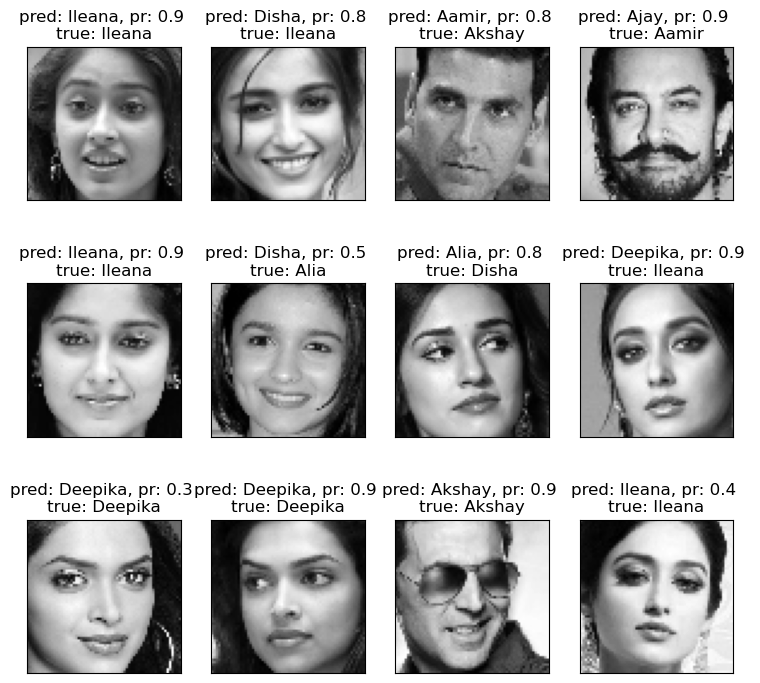

In [8]:
# Import necessary libraries
import numpy as np

# Initialize lists to store predictions and probabilities
y_pred = []
y_prob = []

# Iterate through each test face
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.argmax(prob)
    
    # Append the predicted class and the highest probability
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

# Transform the predictions to a numpy array
y_pred = np.array(y_pred)

# Initialize list for prediction titles
prediction_titles = []
true_positive = 0

# Iterate through each prediction
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    
    # Count true positives
    if true_name == pred_name:
        true_positive += 1

# Calculate accuracy
accuracy = true_positive * 100 / y_pred.shape[0]
print("Accuracy:", accuracy)

# Function to plot gallery of portraits
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# Plot results
plot_gallery(X_test, prediction_titles, h, w)
plt.show()
